In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonctions B-Spline
La fonction coxdeboor retourne le résultat de l'algorithme de floraison (Cox - De Boor).

La fonction bspline retourne les points de la courbe de B-Spline pour les points de contrôle, l'odre et le vecteur nodal donnés.

In [ ]:
def coxdeboor(k, u, nodal, ctrlX, ctrlY):
  j = k
  dec = 0
  while(u > nodal[j]):
    j = j + 1
    dec = dec + 1

  pcalcX = []
  pcalcY = []
  for m in range(k):
    pcalcX.append(ctrlX[dec+m])
    pcalcY.append(ctrlY[dec+m])
  for j in range(k-1):
    for i in range(k-j-1):
      pcalcX[i] = (pcalcX[i]*(nodal[dec+k+i]-u)/(nodal[dec+k+i]-nodal[dec+1+i+j])) + (pcalcX[i+1]* (u-nodal[dec+1+i+j])/(nodal[dec+k+i]-nodal[dec+1+i+j]))
      pcalcY[i] = (pcalcY[i]*(nodal[dec+k+i]-u)/(nodal[dec+k+i]-nodal[dec+1+i+j])) + (pcalcY[i+1]* (u-nodal[dec+1+i+j])/(nodal[dec+k+i]-nodal[dec+1+i+j]))
  return pcalcX[0], pcalcY[0]

In [ ]:
def bspline(k, nodal, ctrlX, ctrlY):
  resX = []
  resY = []
  for u in np.arange(nodal[k-1], nodal[len(ctrlX)], 0.01):
    x, y = coxdeboor(k, u, nodal, ctrlX, ctrlY)
    resX.append(x)
    resY.append(y)
  return resX, resY

Tests B-Spline

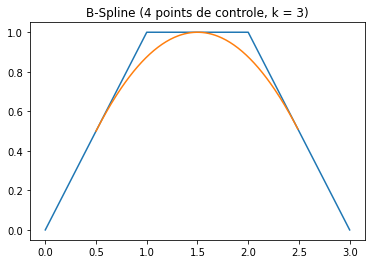

In [ ]:
# test B-Spline (4 points de controle, k = 3)
ctrlX = [0, 1, 2, 3]
ctrlY = [0, 1, 1, 0]
nodal = [0, 1, 2, 3, 4, 5, 6]
k=3
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (4 points de controle, k = 3)")
plt.show()

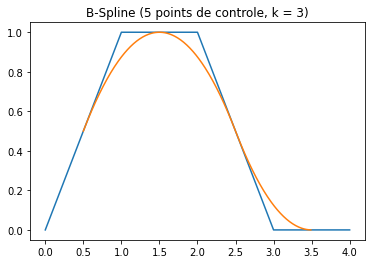

In [ ]:
# test B-Spline (5 points de controle, k = 3)
ctrlX = [0, 1, 2, 3, 4]
ctrlY = [0, 1, 1, 0, 0]
nodal = [0, 1, 2, 3, 4, 5, 6, 7]
k=3
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (5 points de controle, k = 3)")
plt.show()

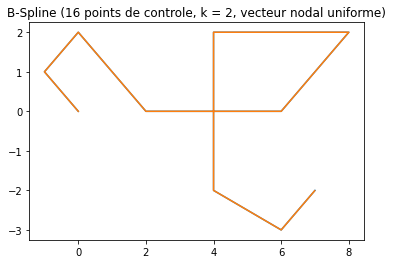

In [ ]:
# test B-Spline (16 points de controle, k = 2, vecteur nodal uniforme)
ctrlX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
ctrlY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
nodal = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
k = 2
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (16 points de controle, k = 2, vecteur nodal uniforme)")
plt.show()

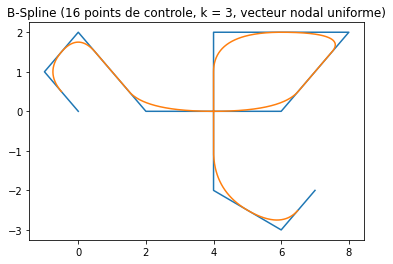

In [ ]:
# test B-Spline (16 points de controle, k = 3, vecteur nodal uniforme)
ctrlX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
ctrlY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
nodal = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
k = 3
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (16 points de controle, k = 3, vecteur nodal uniforme)")
plt.show()

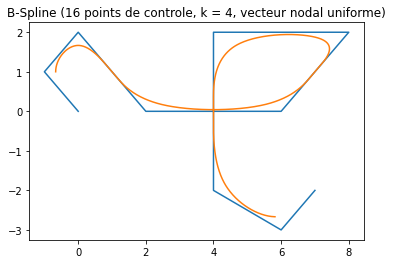

In [ ]:
# test B-Spline (16 points de controle, k = 4, vecteur nodal uniforme)
ctrlX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
ctrlY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
nodal = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
k = 4
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (16 points de controle, k = 4, vecteur nodal uniforme)")
plt.show()

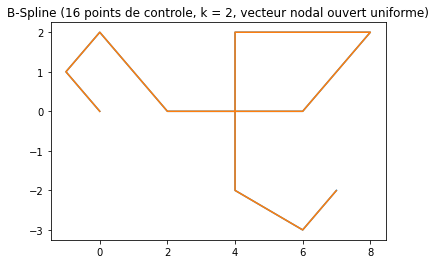

In [ ]:
# test B-Spline (16 points de controle, k = 2, vecteur nodal ouvert uniforme)
ctrlX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
ctrlY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
nodal = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15]
k = 2
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (16 points de controle, k = 2, vecteur nodal ouvert uniforme)")
plt.show()

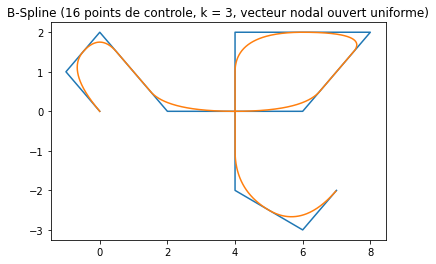

In [ ]:
# test B-Spline (16 points de controle, k = 3, vecteur nodal ouvert uniforme)
ctrlX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
ctrlY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
nodal = [0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 14]
k = 3
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (16 points de controle, k = 3, vecteur nodal ouvert uniforme)")
plt.show()

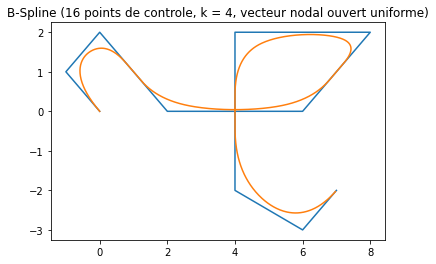

In [ ]:
# test B-Spline (16 points de controle, k = 4, vecteur nodal ouvert uniforme)
ctrlX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
ctrlY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
nodal = [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13, 13]
k = 4
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline (16 points de controle, k = 4, vecteur nodal ouvert uniforme)")
plt.show()

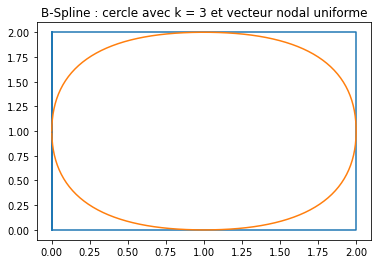

In [ ]:
# test B-Spline : cercle avec k = 3 et vecteur nodal uniforme
ctrlX = [0, 0, 2, 2, 0, 0]
ctrlY = [0, 2, 2, 0, 0, 2]
nodal = [0, 1, 2, 3, 4, 5, 6, 7, 8]
k = 3
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline : cercle avec k = 3 et vecteur nodal uniforme")
plt.show()

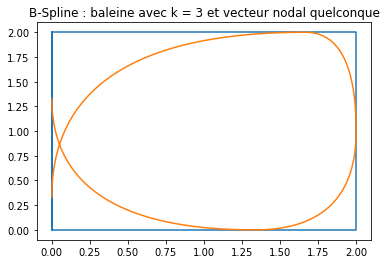

In [ ]:
# test B-Spline : baleine avec k = 3 et vecteur nodal quelconque
ctrlX = [0, 0, 2, 2, 0, 0]
ctrlY = [0, 2, 2, 0, 0, 2]
nodal = [0, 1, 2, 7, 8, 9, 11, 12, 13]
k = 3
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline : baleine avec k = 3 et vecteur nodal quelconque")
plt.show()

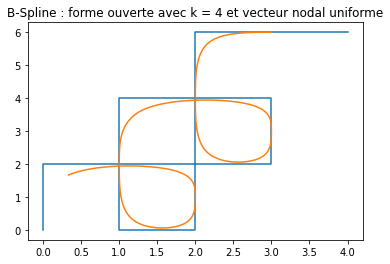

In [ ]:
# test B-Spline : forme ouverte avec k = 4 et vecteur nodal uniforme
ctrlX = [0, 0, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 4]
ctrlY = [0, 2, 2, 1, 0, 0, 2, 4, 4, 3, 2, 2, 4, 6, 6, 6]
nodal = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
k = 4
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline : forme ouverte avec k = 4 et vecteur nodal uniforme")
plt.show()

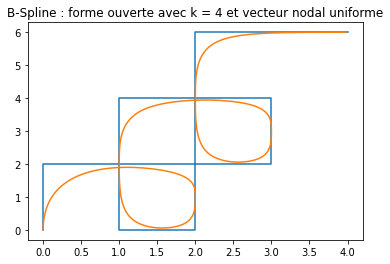

In [ ]:
# test B-Spline : forme ouverte avec k = 4 et vecteur nodal ouvert uniforme
ctrlX = [0, 0, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 4]
ctrlY = [0, 2, 2, 1, 0, 0, 2, 4, 4, 3, 2, 2, 4, 6, 6, 6]
nodal = [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13, 13]
k = 4
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline : forme ouverte avec k = 4 et vecteur nodal uniforme")
plt.show()

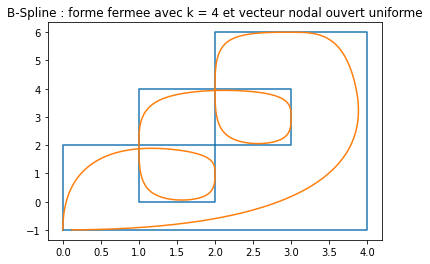

In [ ]:
# test B-Spline : forme fermee avec k = 4 et vecteur nodal ouvert uniforme
ctrlX = [0, 0, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 4, 4, 0]
ctrlY = [-1, 2, 2, 1, 0, 0, 2, 4, 4, 3, 2, 2, 4, 6, 6, 6, -1, -1]
nodal = [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 15, 15]
k = 4
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline : forme fermee avec k = 4 et vecteur nodal ouvert uniforme")
plt.show()

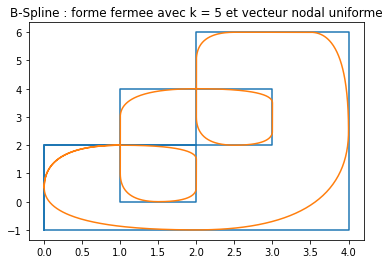

In [ ]:
# test B-Spline : forme fermee avec k = 3 et vecteur nodal uniforme
ctrlX = [0, 0, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 4, 4, 0, 0, 2]
ctrlY = [-1, 2, 2, 1, 0, 0, 2, 4, 4, 3, 2, 2, 4, 6, 6, 6, -1, -1, 2, 2]
nodal = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
k = 3
plt.plot(ctrlX, ctrlY)
resX, resY = bspline(k, nodal, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("B-Spline : forme fermee avec k = 5 et vecteur nodal uniforme")
plt.show()